In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('../data/slurm_wrapper_ce5.log') as f:
    data = ([line.split() for line in f])
with open('../data/slurm_wrapper_ce6.log') as f:
    data.extend([line.split() for line in f])

In [3]:
error_data = [x for x in data if x[13] == '1']

In [6]:
ce = pd.DataFrame([[pd.to_datetime(x[0] + 'T' + x[1])] 
                       for x in error_data], columns=['TIME'])

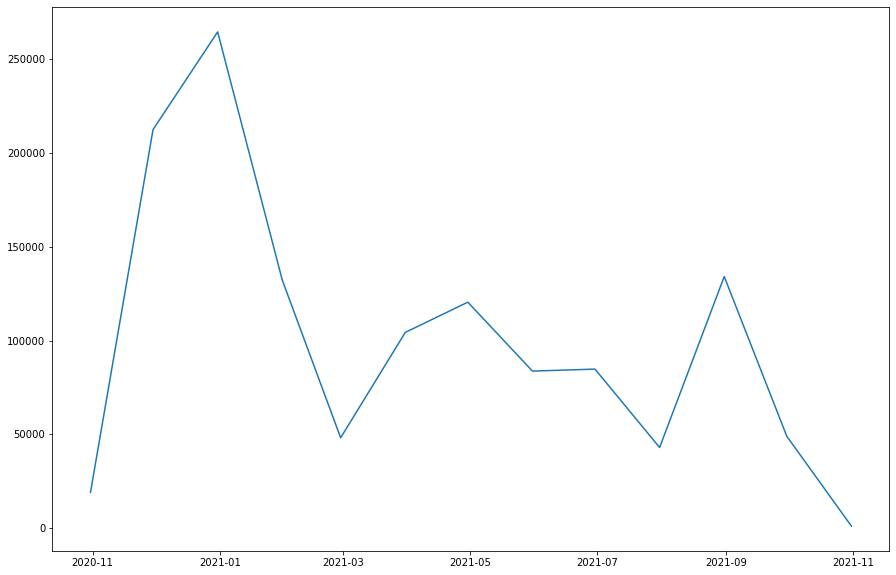

In [9]:
ce_ts = pd.Series(1, index=list(ce['TIME']))
ce_resample = ce_ts.resample('M').sum()
plt.figure(figsize=(15, 10))
plt.plot(ce_resample.index, ce_resample)

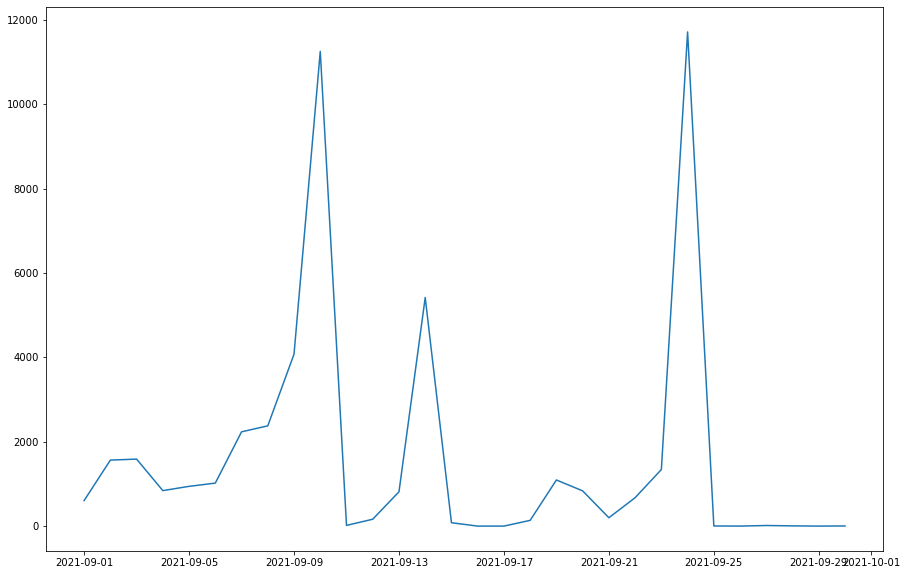

In [11]:
ce_ts = pd.Series(1, index=list(ce[ce['TIME'].dt.month == 9]['TIME']))
ce_resample = ce_ts.resample('D').sum()
plt.figure(figsize=(15, 10))
plt.plot(ce_resample.index, ce_resample)

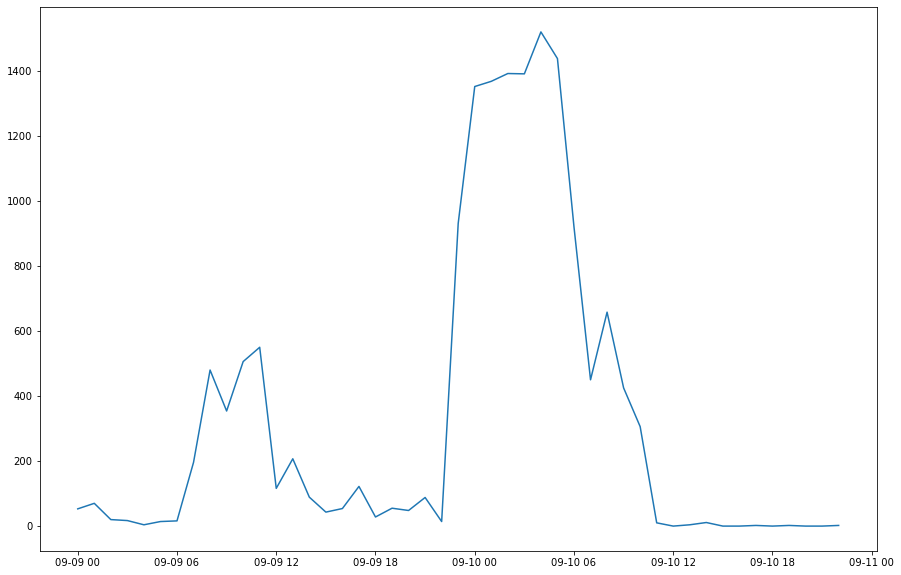

In [15]:
ce_ts = pd.Series(1, index=list(ce[(ce['TIME'].dt.month == 9) & (ce['TIME'].dt.day.isin([9,10]))]['TIME']))
ce_resample = ce_ts.resample('H').sum()
plt.figure(figsize=(15, 10))
plt.plot(ce_resample.index, ce_resample)

In [16]:
ce_99 = ce[(ce['TIME'].dt.month == 9) & (ce['TIME'].dt.day.isin([9,10]))]

In [25]:
data99 = [x for x in data if '-09-09' in x[0] or '-09-10' in x[0]]

In [29]:
ce = pd.DataFrame([[pd.to_datetime(x[0] + 'T' + x[1]), float(x[10]), int(x[13]), x[16]] 
                       for x in data99], columns=['BEGIN', 'DURATION', 'RETURNCODE', 'COMMAND'])

In [32]:
ce[ce['RETURNCODE'] == 1].describe()

,DURATION,RETURNCODE
count,15326.000000,15326.0
mean,22.247647,1.0
std,11.176834,0.0
min,0.018596,1.0
25%,20.042032,1.0
50%,20.079823,1.0
75%,20.258859,1.0
max,124.144746,1.0
